# Working with CHESS data

## Import functions

In [1]:
'''
Tools for reading scattering datasets collected at CHESS (ID4B).
'''

from nxs_analysis_tools import load_data, plot_slice, Scissors
from nexusformat.nexus import NXentry
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os

class TempDependence():
	'''
	'''
	def __init__(self):
		'''
		'''
		self.datasets=NXentry()
		self.folder=None
		self.temperatures=None

	def get_folder(self):
		'''
		'''
		return self.folder

	def clear_datasets(self):
		self.datasets=NXentry()

	def load_datasets(self, folder, file_ending='hkli.nxs', temperatures_list=None):
		'''
		'''
		self.folder = os.path.normpath(folder)

		temperature_folders=[] # Empty list to store temperature folder names
		for item in os.listdir(self.folder):
		  try:
		    temperature_folders.append(int(item)) # If folder name can be converted to int, add it
		  except ValueError:
		    pass # Otherwise don't add it
		temperature_folders.sort() # Sort from low to high T
		temperature_folders = [str(i) for i in temperature_folders] # Convert to strings

		self.temperatures = temperature_folders

		if temperatures_list is not None:
			temperature_folders = [str(t) for t in temperatures_list]
		else:
			temperature_folders = self.temperatures

		self.temperatures = temperature_folders

		# Load .nxs files
		for temperature in temperature_folders:
			for file in os.listdir(os.path.join(self.folder,temperature)):
				if file.endswith(file_ending):
					filepath = os.path.join(self.folder,temperature, file)
					print('-----------------------------------------------')
					print('Loading ' + temperature + ' K indexed .nxs files...')
					print('Found ' + filepath)
					self.datasets[temperature] = load_data(filepath)

	def cut_data(self, center, window, axis=None):
		self.scissors = [Scissors() for _ in range(len(self.temperatures))]
		for i,T in enumerate(self.temperatures):
			print("-------------------------------")
			print("Cutting T = " + T + " K data...")
			self.scissors[i].set_data(self.datasets[T])
			self.scissors[i].cut_data(center, window, axis)

		self.linecuts = [scissors.linecut for scissors in self.scissors]
		return self.linecuts

	def plot_linecuts(self, vertical_offset=0, **kwargs):
	    fig, ax = plt.subplots()

	    # Get the Viridis colormap
	    cmap = mpl.colormaps.get_cmap('viridis')

	    for i, linecut in enumerate(self.linecuts):
	        x_data = linecut[linecut.axes[0]].nxdata
	        y_data = linecut[linecut.signal].nxdata + i*vertical_offset
	        ax.plot(x_data, y_data, color=cmap(i / len(self.linecuts)), label=linecut.nxname, **kwargs)
        
	    xlabel_components = [linecut.axes[0] if i == self.scissors[0].axis else str(c) for i,c in enumerate(self.scissors[0].center)]
	    xlabel = ' '.join(xlabel_components)
	    ax.set(xlabel=xlabel,
               ylabel=linecut.signal)
	    plt.legend()
	    plt.show()

## Intializing a `TempDependence` object

It is assumed that the file structure of the temperature dependent scan is as follows:
 ```plaintext
example_data
└── sample_name
    ├── 15
    ├── 100
    └── 300
``` 
Here we create a `TempDependence` objecct called `sample` whose temperature folders are found in the path `'example_data/sample_name'`.

In [2]:
sample = TempDependence()

Use the `load_datasets()` method to load the ".nxs" files. By default, all files ending with "hkli.nxs" are imported, but this can be changed using the `file_ending` parameter.

In [3]:
sample.load_datasets(folder='example_data/sample_name', file_ending="hkli.nxs")

-----------------------------------------------
Loading 15 K indexed .nxs files...
Found example_data\sample_name\15\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)
-----------------------------------------------
Loading 100 K indexed .nxs files...
Found example_data\sample_name\100\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)
-----------------------------------------------
Loading 300 K indexed .nxs files...
Found example_data\sample_name\300\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)


A subset of temperatures can be imported using the `temperatures_list` parameter. Temperatures can be listed here as numeric values (`[15,300]`) or as strings (`['15','300']`).

In [4]:
sample.load_datasets(folder='example_data/sample_name', temperatures_list=[15,300])

-----------------------------------------------
Loading 15 K indexed .nxs files...
Found example_data\sample_name\15\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)
-----------------------------------------------
Loading 300 K indexed .nxs files...
Found example_data\sample_name\300\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)


## Accessing the datasets at each temperature

In [5]:
sample.load_datasets(folder='example_data/sample_name')

-----------------------------------------------
Loading 15 K indexed .nxs files...
Found example_data\sample_name\15\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)
-----------------------------------------------
Loading 100 K indexed .nxs files...
Found example_data\sample_name\100\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)
-----------------------------------------------
Loading 300 K indexed .nxs files...
Found example_data\sample_name\300\example_hkli.nxs
data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)


The datasets are stored under the `.datasets` attribute of the `TempDependence` object.

In [6]:
sample.datasets

NXentry('entry')

In [7]:
print(sample.datasets.tree)

entry:NXentry
  15:NXdata
    @axes = ['H', 'K', 'L']
    @signal = 'counts'
    H = float64(100)
    K = float64(150)
    L = float64(200)
    counts = float64(100x150x200)
  100:NXdata
    @axes = ['H', 'K', 'L']
    @signal = 'counts'
    H = float64(100)
    K = float64(150)
    L = float64(200)
    counts = float64(100x150x200)
  300:NXdata
    @axes = ['H', 'K', 'L']
    @signal = 'counts'
    H = float64(100)
    K = float64(150)
    L = float64(200)
    counts = float64(100x150x200)


Use square brackets to index the individual datasets in the `NXentry`. Each dataset is a `NXdata` object and possesses the corresponding attributes and methods.

In [8]:
sample.datasets['15']

NXdata('15')

For example, each `NXdata` object has a `.plot()` method. Here we plot the L=0.0 plane.

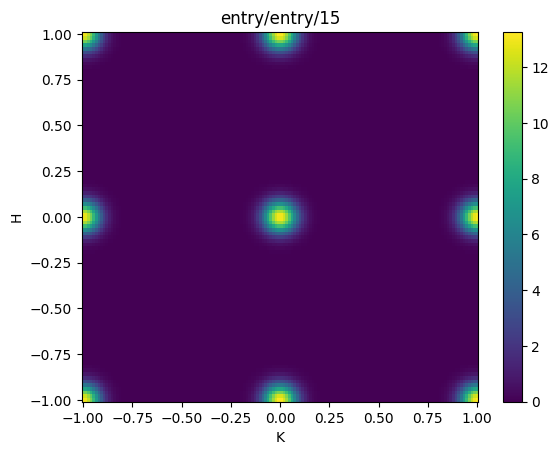

In [9]:
sample.datasets['15'][:,:,0.0].plot()

A list of temperatures is then stored in the `.temperatures` attribute of the `TempDependence` object.

In [10]:
sample.temperatures

['15', '100', '300']

## Temperature dependent linecuts

In [11]:
sample.cut_data(center=(0,0,0), window=(0.1,0.1,1))

-------------------------------
Cutting T = 15 K data...
Linecut axis: L
Integrated axes: ['H', 'K']
-------------------------------
Cutting T = 100 K data...
Linecut axis: L
Integrated axes: ['H', 'K']
-------------------------------
Cutting T = 300 K data...
Linecut axis: L
Integrated axes: ['H', 'K']


[NXdata('15'), NXdata('100'), NXdata('300')]

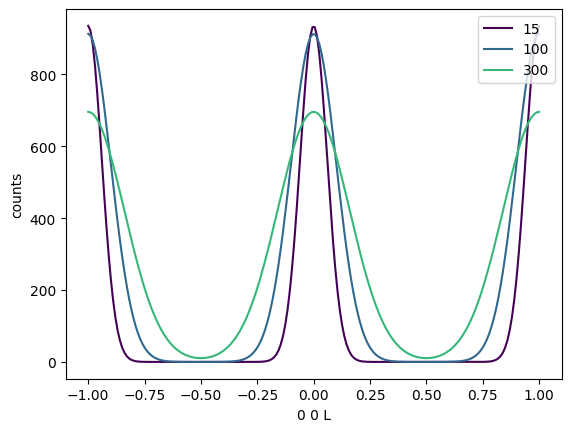

In [12]:
sample.plot_linecuts()

Any keyword arguments are passed to a `matplotlib` function `ax.plot()` within `.plot_linecuts()`, so the usual `matplotlib` parameters can be used to change the formatting.

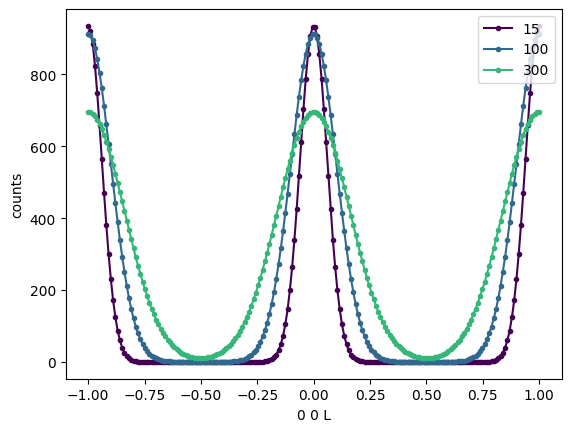

In [13]:
sample.plot_linecuts(linestyle='-', marker='.')